In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from zillow import get_zillow_data, drop_duplicates, sfh, handle_missing_values
from prepare import remove_outliers, train_val_test, x_y_split

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import stats


In [32]:
df = get_zillow_data()

In [33]:
df= drop_duplicates(df)

In [34]:
df = sfh(df)

In [35]:
df = handle_missing_values(df, .4, .4)

In [36]:
df, var_fences = remove_outliers(df, num = 25, k= 3)

propertylandusetypeid column ignored
heatingorsystemtypeid column ignored
bathroomcnt column ignored
bedroomcnt column ignored
buildingqualitytypeid column ignored
calculatedbathnbr column ignored
fips column ignored
fullbathcnt column ignored
propertycountylandusecode is not a float or int
propertyzoningdesc is not a float or int
regionidcounty column ignored
roomcnt column ignored
unitcnt column ignored
assessmentyear column ignored
heatingorsystemdesc column ignored
transactiondate is not a float or int
propertylandusedesc column ignored


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47598 entries, 0 to 77578
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         47598 non-null  float64
 1   parcelid                      47598 non-null  int64  
 2   heatingorsystemtypeid         31133 non-null  float64
 3   id                            47598 non-null  int64  
 4   bathroomcnt                   47598 non-null  float64
 5   bedroomcnt                    47598 non-null  float64
 6   buildingqualitytypeid         30957 non-null  float64
 7   calculatedbathnbr             47573 non-null  float64
 8   calculatedfinishedsquarefeet  47598 non-null  float64
 9   finishedsquarefeet12          47598 non-null  float64
 10  fips                          47598 non-null  float64
 11  fullbathcnt                   47573 non-null  float64
 12  latitude                      47598 non-null  float64
 13  l

In [38]:
df.shape

(47598, 34)

In [39]:
df['transactiondate'].nunique()

257

In [40]:
df['buildingqualitytypeid'].nunique()

12

<AxesSubplot:xlabel='buildingqualitytypeid', ylabel='logerror'>

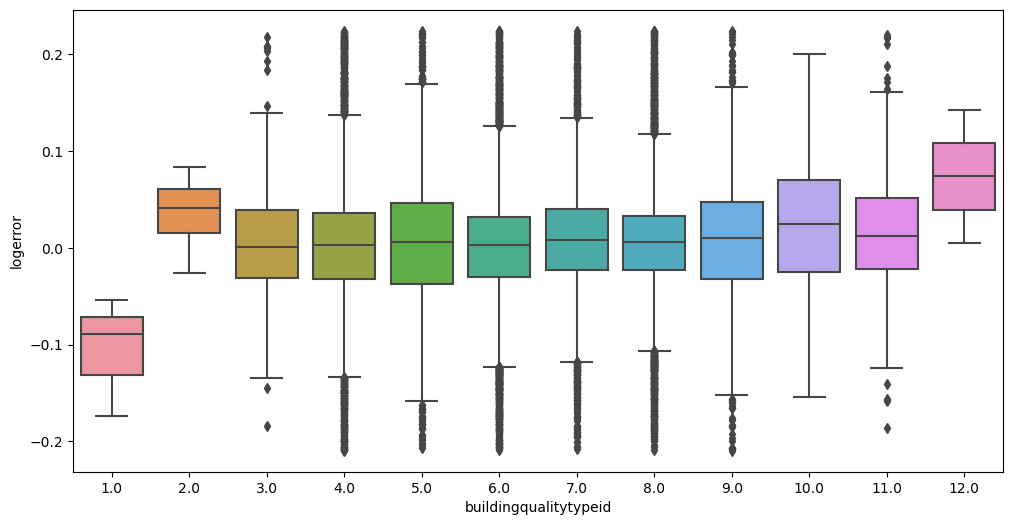

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='buildingqualitytypeid', y='logerror', data=df)

### The log error is much lower on building quality type 1 and much higher on type 12 but everything in between seems to be very close to 0

<AxesSubplot:xlabel='heatingorsystemtypeid', ylabel='logerror'>

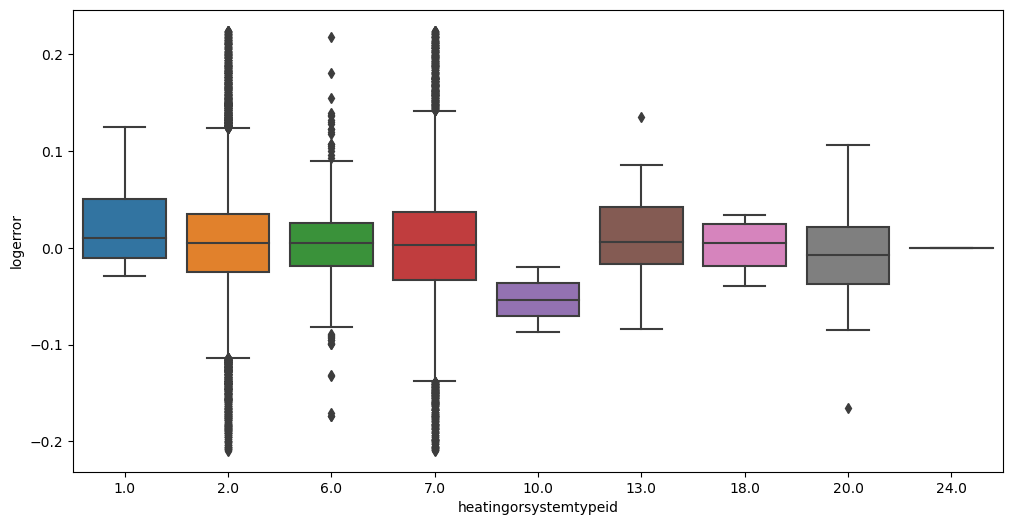

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x='heatingorsystemtypeid', y='logerror', data=df)

### The log error is very close on average for all except the heating system type 10

<AxesSubplot:xlabel='calculatedbathnbr', ylabel='logerror'>

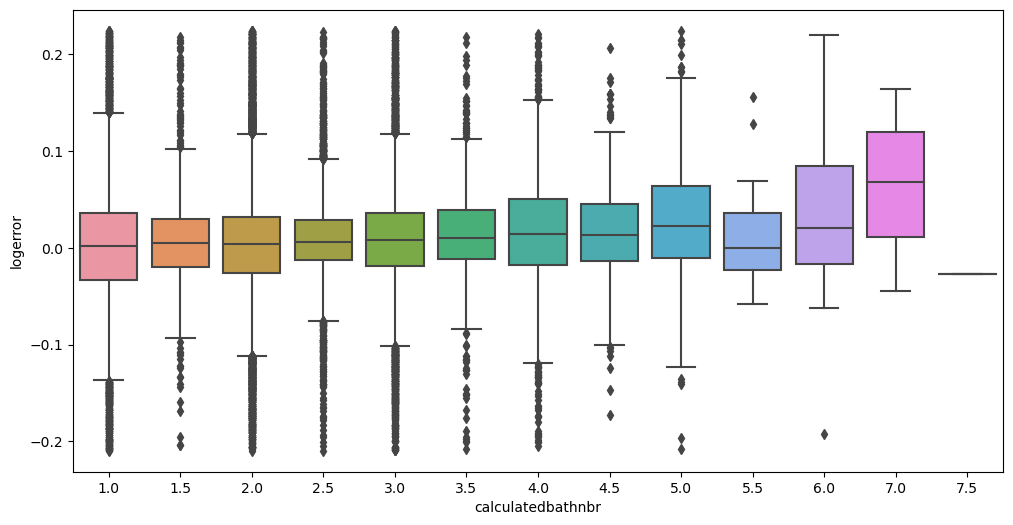

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='calculatedbathnbr', y='logerror', data=df)

### There is a slight curve upwards as the bath and bedroom number increases

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

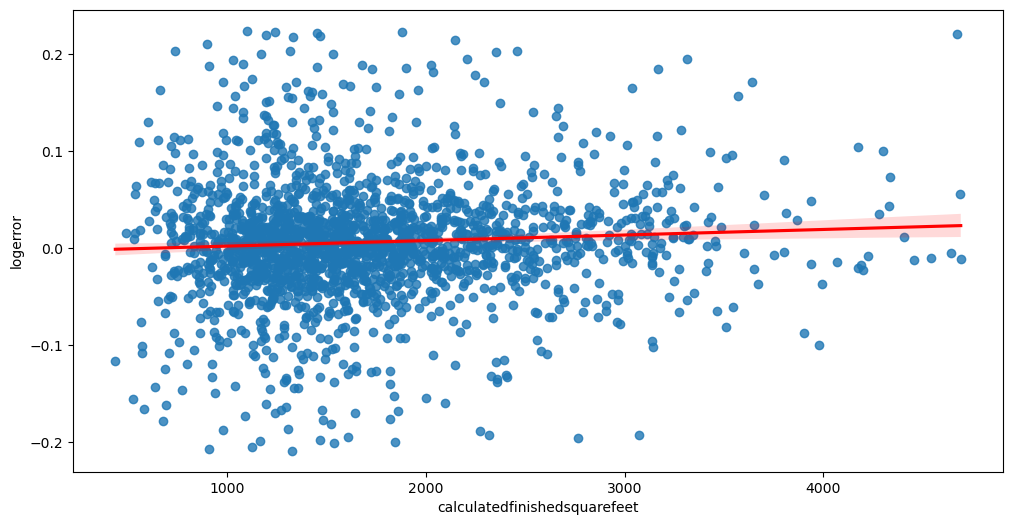

In [56]:
plt.figure(figsize=(12,6))
sns.regplot(x='calculatedfinishedsquarefeet', y='logerror', data=df.sample(2000), line_kws={'color':'red'})

### There is a slight curve upwards for the log error as the square feet increases.

<AxesSubplot:xlabel='regionidzip', ylabel='logerror'>

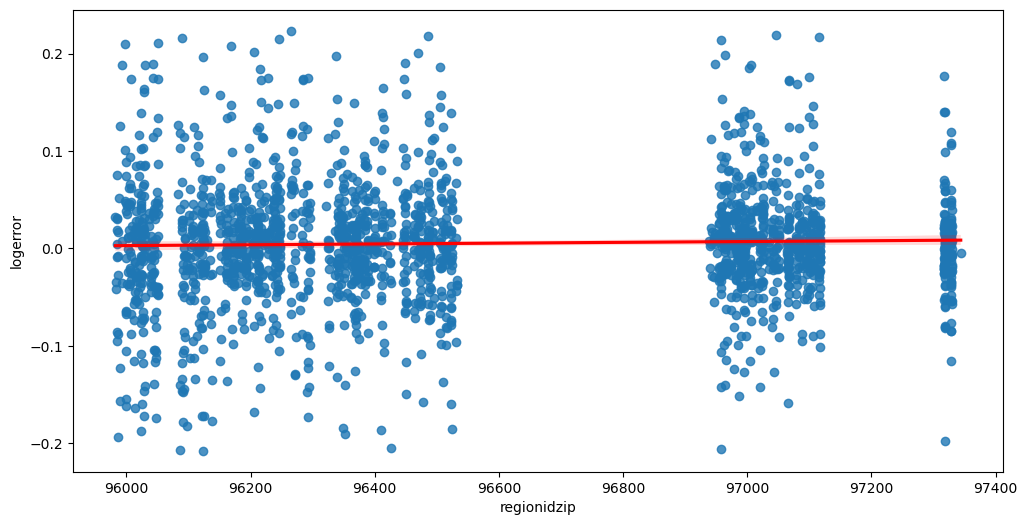

In [62]:
plt.figure(figsize=(12,6))
sns.regplot(x='regionidzip', y='logerror', data=df.sample(2000), line_kws={'color':'red'})

### The log error stays right at zero for all zip codes

<AxesSubplot:xlabel='regionidcounty', ylabel='logerror'>

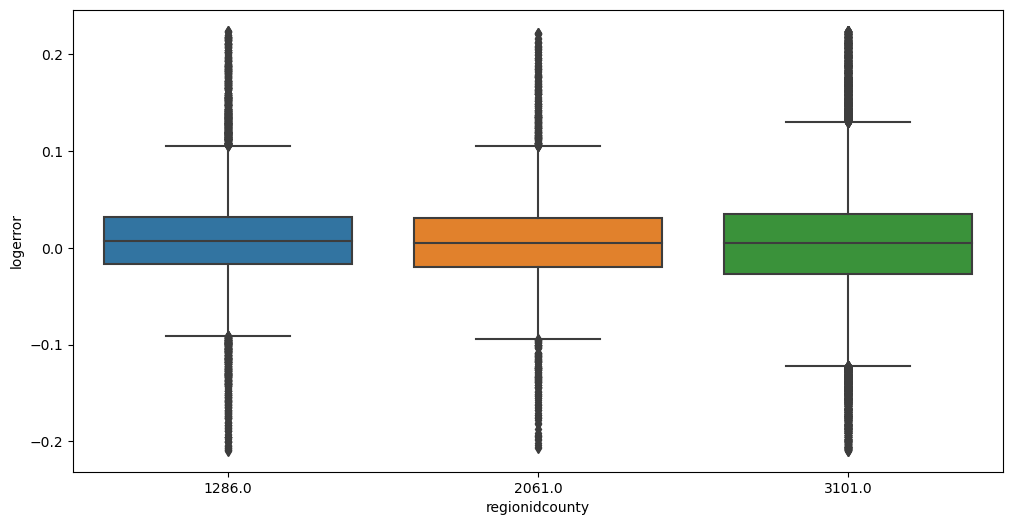

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(x='regionidcounty', y='logerror', data=df)

### Once again the log error stays right at zero for each county.